## Unit 3 Lesson 1, Assignment 1

In [2]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.DataFrame()
df['age'] = [24, 42, 27, 24, 35, 54, 35, 37]

In [3]:
mean = sum(df['age']) / len(df['age'])
print(mean)

34.75


In [4]:
mean = np.mean(df['age'])
print(mean)

34.75


In [5]:
statistics.median(df['age'])

35.0

In [6]:
statistics.mode(df['age'])

StatisticsError: no unique mode; found 2 equally common values

In [7]:
# Generate a list of unique elements along with how often they occur
(values, counts) = np.unique(df['age'], return_counts=True)

# The location in the values list for the most-frequently occuring element
# Only finds index for first mode
ind = np.argmax(counts)

print(values[ind])

print(values)
print(counts)

24
[24 27 35 37 42 54]
[2 1 2 1 1 1]


## Variance

In [8]:
v = sum((df['age'] - np.mean(df['age'])) ** 2) / (len(df['age'])-1)
print(v)

102.78571428571429


In [9]:
std = np.sqrt(v)
print(std)

10.138328969101087


In [10]:
print(df['age'].var())
print(np.var(df.age, ddof=1))

102.78571428571429
102.78571428571429


## Standard Error

In [11]:
se = v ** 0.5 / (len(df['age']) ** 0.5)

In [12]:
print(se)

3.584440581975699


In [13]:
np.std(df['age'], ddof=1)/ np.sqrt(len(df['age']))

3.584440581975699

### Examine sampling from populations with high and low population variance

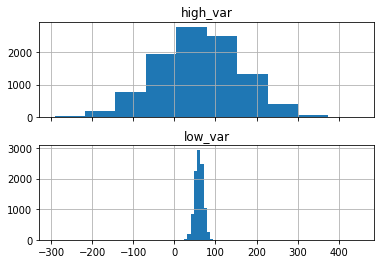

low_var     103.030903
high_var    449.490208
dtype: float64
low_var      23.517172
high_var   -292.200910
dtype: float64


In [14]:
pop = pd.DataFrame()

pop['low_var'] = np.random.normal(60, 10 , 10000)
pop['high_var'] = np.random.normal(60, 100, 10000)

pop.hist(layout=(2,1), sharex=True)
plt.show()

print(pop.max())
print(pop.min())

## Samples from populations above

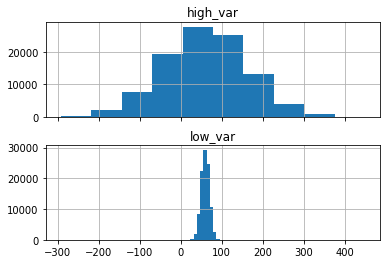

low_var     60.058926
high_var    59.855629
dtype: float64
low_var      10.047199
high_var    101.071036
dtype: float64
low_var      10.047199
high_var    101.071036
dtype: float64


In [15]:
# Take a random sample of 100 observations from each variable and store in new dataframe

sample=pd.DataFrame()
sample['low_var'] = np.random.choice(pop['low_var'], 100000)
sample['high_var'] = np.random.choice(pop['high_var'], 100000)

# Create histograms
sample.hist(layout=(2,1), sharex=True)
plt.show()

print(sample.mean())
print(sample.std())
print(sample.std(ddof=1))

## Describing Data with Pandas

In [16]:
data = pd.DataFrame()
data['gender'] = ['male'] * 100 + ['female'] * 100
data['height'] = np.append(np.random.normal(69, 8, 100), np.random.normal(54, 5, 100))
data['weight'] = np.append(np.random.normal(195, 25, 100), np.random.normal(166, 15, 100))

In [19]:
print(data.max(), data.min())

gender       male
height    85.7864
weight     267.15
dtype: object gender     female
height    44.4643
weight    122.759
dtype: object


In [20]:
data.head()

,gender,height,weight
0,male,60.447354,170.227833
1,male,65.201672,183.252357
2,male,62.713124,233.986595
3,male,61.941481,212.702666
4,male,58.526904,191.962492


In [21]:
data.tail()

,gender,height,weight
195,female,57.164252,168.545036
196,female,58.901086,187.016667
197,female,55.588411,155.981172
198,female,60.588919,151.668378
199,female,48.510642,175.271211


In [23]:
data.describe()

,height,weight
count,200.000000,200.000000
mean,61.954075,180.980150
std,9.179225,25.785104
min,44.464303,122.758544
25%,55.220701,163.631305
50%,60.871158,176.313556
75%,68.700944,194.314242
max,85.786395,267.150367


In [31]:
data.groupby('gender').describe()

height                                                        \
        count       mean       std        min        25%        50%   
gender                                                                
female  100.0  55.102209  4.991104  44.464303  51.466273  55.672987   
male    100.0  68.805941  7.043561  50.751471  63.092810  68.789598   

                             weight                                     \
              75%        max  count        mean        std         min   
gender                                                                   
female  58.598880  65.938663  100.0  164.863402  13.758369  126.095925   
male    73.777639  85.786395  100.0  197.096898  24.948341  122.758544   

                                                        
               25%         50%         75%         max  
gender                                                  
female  154.767979  166.655434  174.309817  201.724508  
male    180.861896  194.235767  215.623276  267.150367

In [32]:
data.gender.value_counts()

male      100
female    100
Name: gender, dtype: int64

In [34]:
data.weight.value_counts().head()

153.222405    1
174.773562    1
166.107325    1
153.684690    1
191.962492    1
Name: weight, dtype: int64